# Linear Regression

### Delivery_time -> Predict delivery time using sorting time using (delivery_time.csv)

    I am not sure if we can build a Salary Hike model as Salary hike depends on whole lot of other parameters such as Skills, Attitude, Leadership, Experience, Resourcefullness, Speed-Accuracy-Precission in performance etc. 
    
    However in our case we can predict the salary based on the years of experience, considering all other parameters as constants or equal. Our model should be able to predict the ideal salary to be offered to a person with certain experience expressed in years. let us begin our model building.... 

In [1]:
import pandas as pd 
import numpy as np

In [5]:
DelData = pd.read_csv('delivery_time.csv')
Sal.shape

(21, 2)

In [6]:
DelData # As data has no null values and entire data is float. Data is ready for processing.

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [20]:
DelData.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [22]:
DelData.columns = ['Del_Time','Sorting_Time']
DelData.columns

Index(['Del_Time', 'Sorting_Time'], dtype='object')

In [4]:
import matplotlib as plt
import seaborn as sns

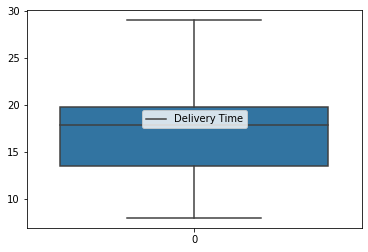

In [23]:
sns.boxplot(data = [DelData['Del_Time']]) # Data is slightly positively skewed
plt.pyplot.legend(['Delivery Time'])

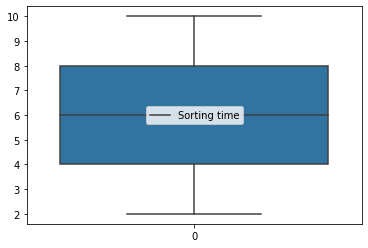

In [24]:
sns.boxplot(data = [DelData["Sorting_Time"]]) # data is skewed (positive)
plt.pyplot.legend(['Sorting time'])

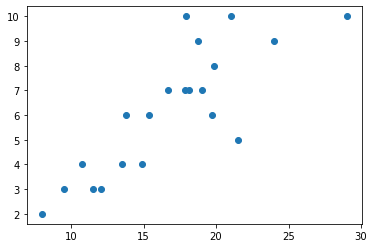

In [25]:
plt.pyplot.scatter(DelData['Del_Time'],DelData['Sorting_Time']) ### it shows a strong possitive correlation let us calculate correlation (r)

In [15]:
DelData.corr() ## shows very high correlation between the the two Variables. Anything > .8 is a good score 

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [26]:
DelData["Del_Time"].corr(DelData["Sorting_Time"]) # alternatively we can check the correlation by specific veriables

0.8259972607955326

### Case for linear regression

    There is Direct Linear relation between "Sorting Time" and "Delivery Time", Correlation coefficient of .825, The data is continuous data. All these conditions are perfectly suitable to Simple Linear Regression for our model building.
    
    Based on common sence we can say that "Delivery time" is dependent on "Sorting time" and not vice versa.

### Construct a linear Regression model, let us import ols from statsmodels.formula.api

In [17]:
from statsmodels.formula.api import ols

In [28]:
Del_Model = ols('Del_Time~Sorting_Time',data=DelData).fit() # fitting the model using ols method

In [29]:
Del_Model.params  

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [32]:
Del_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Del_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           3.98e-06
Time:                        14:55:18   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we know Rsquare can take values ranging from 0 to 1, 0 being the worst and 1 being the best scores. Our model has a very good Rsquare score of 0.682. There is possibility of improving the model Rsquare score by applying transformation on our variables.

In [33]:
Del_Model.conf_int(0.99)

,0,1
Intercept,6.560869,6.604599
Sorting_Time,1.645741,1.652298


Confidence interval for any regression model will give us a range with upper and lower limit using the fitted value. The interpretation is with the specified significance level, Alpha, the interval conatains the true mean of the population, smaller the range the bettwe it is. 

In [36]:
Predict_val = Del_Model.predict(DelData.Sorting_Time)

In [37]:
Predict_val.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

Text(0, 0.5, 'Delivery Time')

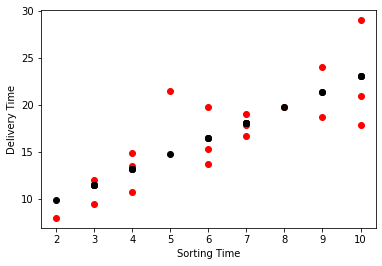

In [38]:
# sns.scatterplot(x = Sal.YearsExperience, y = Sal.Salary );sns.scatterplot(x = Sal.YearsExperience, y = Predict_val )
plt.pyplot.scatter(x = DelData.Sorting_Time, y = DelData.Del_Time, color = 'red')
plt.pyplot.scatter(x = DelData.Sorting_Time, y = Predict_val, color = 'black')
plt.pyplot.xlabel('Sorting Time'); plt.pyplot.ylabel('Delivery Time')

In [39]:
Resid_vals = Del_Model.resid_pearson
Resid_vals

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

Text(0, 0.5, 'Deviated Values')

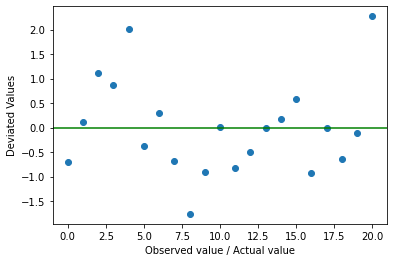

In [40]:
plt.pyplot.plot(Resid_vals,'o');plt.pyplot.axhline(y=0, color = 'green')
plt.pyplot.xlabel('Observed value / Actual value'); plt.pyplot.ylabel('Deviated Values')

Residual values are scattered in the range of -1.5 to 2.0, not so vey far from the Regression line. Ideally the residuals should randomly scatter over the plot on either side of the line, showing no uniformity in their vaience or showing no pattern.

##### Both the plots are to demonstrate the accuracy of our model. As it is said visuals are more appealing than words. Hence the plots.

# Transforming variables for accuracy

In [41]:
T1 = ols("Del_Time~np.log(DelData.Sorting_Time)", data = DelData).fit()

In [42]:
T1.params

Intercept                       1.159684
np.log(DelData.Sorting_Time)    9.043413
dtype: float64

In [44]:
T1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Del_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           2.64e-06
Time:                        16:01:35   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(DelData.Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
T2 = ols("Del_Time~np.sqrt(Sorting_Time)",data=DelData).fit() 
print('RSQUARE VAL :', T2.rsquared,"\n\n", "**PVALUES**",pd.DataFrame(T2.pvalues))

RSQUARE VAL : 0.6958062276308671 

 **PVALUES**                               0
Intercept              0.410857
np.sqrt(Sorting_Time)  0.000003


In [85]:
T3 = ols("np.sqrt(Del_Time)~np.sqrt(Sorting_Time)",data=DelData).fit() 
print('RSQUARE VAL :', T3.rsquared,"\n\n", "**PVALUES**",pd.DataFrame(T3.pvalues))

RSQUARE VAL : 0.7292011987544664 

 **PVALUES**                                   0
Intercept              1.833621e-04
np.sqrt(Sorting_Time)  8.475706e-07


In [92]:
T4 = ols("np.log(Del_Time)~np.log(Sorting_Time)",data=DelData).fit() 
print('RSQUARE VAL :', T4.rsquared,"\n\n", "**PVALUES**",pd.DataFrame(T4.pvalues))

RSQUARE VAL : 0.77216134926874 

 **PVALUES**                                  0
Intercept             5.921137e-11
np.log(Sorting_Time)  1.601539e-07


### T4 in our transformation model seem to have higher RSQUARE, hence we shall proceed with it. letus do residual plotting on the same.

In [94]:
Log_T4 = T4.predict(pd.DataFrame(DelData.Sorting_Time))
Log_T4.head()

0    3.117833
1    2.570329
2    2.812603
3    3.054878
4    3.117833
dtype: float64

In [95]:
T4_Pred = np.exp(Log_T4)
T4_Pred.head()

0    22.597360
1    13.070123
2    16.653216
3    21.218593
4    22.597360
dtype: float64

In [96]:
T4_Pred.corr(DelData.Del_Time)

0.833146471643729

Text(0, 0.5, 'Delivery Time')

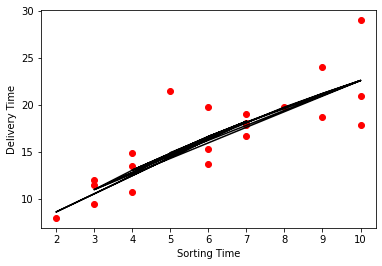

In [107]:
plt.pyplot.scatter(x=DelData.Sorting_Time,y=DelData.Del_Time,color = 'red')
plt.pyplot.plot(DelData.Sorting_Time, T4_Pred, color = 'black')
plt.pyplot.xlabel('Sorting Time'); plt.pyplot.ylabel('Delivery Time')

## Residual Analysis

In [109]:
t_resid = T4.resid_pearson
t_resid

array([-0.47042351,  0.20765416,  1.09439452,  0.79040191,  1.600765  ,
       -0.52289568,  0.25492302, -0.94417959, -1.49533389, -0.79366223,
        0.01730048, -1.2540012 , -0.58073428,  0.28179324,  0.57091402,
        0.83219556, -1.22924105, -0.05292349, -0.49227806, -0.15290982,
        2.3382409 ])

Text(0, 0.5, 'Standardized Residual')

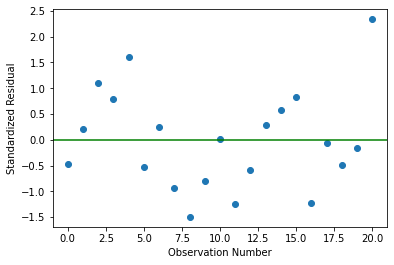

In [111]:
plt.pyplot.plot(T4.resid_pearson,'o');plt.pyplot.axhline(y=0,color='green');
plt.pyplot.xlabel("Observation Number");plt.pyplot.ylabel("Standardized Residual")

Ideally the residuals should randomly scatter over the plot on either side of the line, showing no uniformity in their vaience or showing no pattern. This plot has more randomness than the previous plots.

<AxesSubplot:ylabel='Density'>

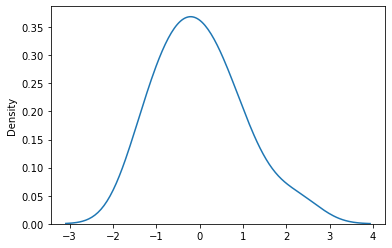

In [116]:
import seaborn as sns
sns.kdeplot(t_resid)

#### Residuals are almost normally distributed. normal distribution of residuals is an indiaction of normal distribution of error accross the entire range of prediction in line with the linearity of our concept.